In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import time
import yfinance as yf
df = yf.download('AAPL', start='2010-01-01', end='2024-12-31')
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440330  6.455076  6.391278  6.422876  493729600
2010-01-05  6.451467  6.487880  6.417461  6.458088  601904800
2010-01-06  6.348848  6.477047  6.342227  6.451467  552160000
2010-01-07  6.337111  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379240  6.379842  6.291367  6.328682  447610800


In [3]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

api_key = "W7QUAT6V7SSS6K76"

# Initialize Alpha Vantage API
ts = TimeSeries(key=api_key, output_format="pandas")

# Fetch historical daily stock data
df, meta_data = ts.get_daily(symbol="AAPL", outputsize="full")

# Convert index to datetime and ensure sorting
df.index = pd.to_datetime(df.index)
df = df.sort_index()  # Ensure the index is in ascending order

# Define time frame
start_date = "2010-01-01"
end_date = "2024-12-31"

# Filter only available dates
df_filtered = df[(df.index >= start_date) & (df.index <= end_date)]

# Save to CSV
csv_filename = "AAPL_stock_data.csv"
df_filtered.to_csv(csv_filename)

print(f"Data saved to {csv_filename}")


Data saved to AAPL_stock_data.csv


In [4]:
df.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
1999-11-01,80.00,80.69,77.37,77.62,2487300.0
1999-11-02,78.00,81.69,77.31,80.25,3564600.0
1999-11-03,81.62,83.25,81.00,81.50,2932700.0
1999-11-04,82.06,85.37,80.62,83.62,3384700.0
1999-11-05,84.62,88.37,84.00,88.31,3721500.0


In [5]:
df.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-03-10,235.540,236.1600,224.22,227.48,71451281.0
2025-03-11,223.805,225.8399,217.45,220.84,76137410.0
2025-03-12,220.140,221.7500,214.91,216.98,62547467.0
2025-03-13,215.950,216.8394,208.42,209.68,61368330.0
2025-03-14,211.250,213.9500,209.58,213.49,60107582.0


In [6]:
df = df.reset_index()
df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,1999-11-01,80.00,80.69,77.37,77.62,2487300.0
1,1999-11-02,78.00,81.69,77.31,80.25,3564600.0
2,1999-11-03,81.62,83.25,81.00,81.50,2932700.0
3,1999-11-04,82.06,85.37,80.62,83.62,3384700.0
4,1999-11-05,84.62,88.37,84.00,88.31,3721500.0


In [7]:
df = df.drop(['date'], axis = 1)
df.head()

,1. open,2. high,3. low,4. close,5. volume
0,80.00,80.69,77.37,77.62,2487300.0
1,78.00,81.69,77.31,80.25,3564600.0
2,81.62,83.25,81.00,81.50,2932700.0
3,82.06,85.37,80.62,83.62,3384700.0
4,84.62,88.37,84.00,88.31,3721500.0


In [8]:
df.columns = ["Open", "High", "Low", "Close", "Volume"]
df.head()


,Open,High,Low,Close,Volume
0,80.00,80.69,77.37,77.62,2487300.0
1,78.00,81.69,77.31,80.25,3564600.0
2,81.62,83.25,81.00,81.50,2932700.0
3,82.06,85.37,80.62,83.62,3384700.0
4,84.62,88.37,84.00,88.31,3721500.0


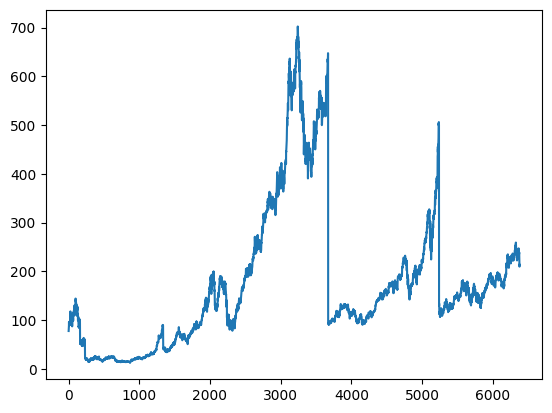

In [9]:
plt.plot(df.Close)

In [10]:
df

,Open,High,Low,Close,Volume
0,80.000,80.6900,77.37,77.62,2487300.0
1,78.000,81.6900,77.31,80.25,3564600.0
2,81.620,83.2500,81.00,81.50,2932700.0
3,82.060,85.3700,80.62,83.62,3384700.0
4,84.620,88.3700,84.00,88.31,3721500.0
...,...,...,...,...,...
6376,235.540,236.1600,224.22,227.48,71451281.0
6377,223.805,225.8399,217.45,220.84,76137410.0
6378,220.140,221.7500,214.91,216.98,62547467.0
6379,215.950,216.8394,208.42,209.68,61368330.0


In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
6376    236.7931
6377    236.6885
6378    236.5198
6379    236.2988
6380    236.1122
Name: Close, Length: 6381, dtype: float64

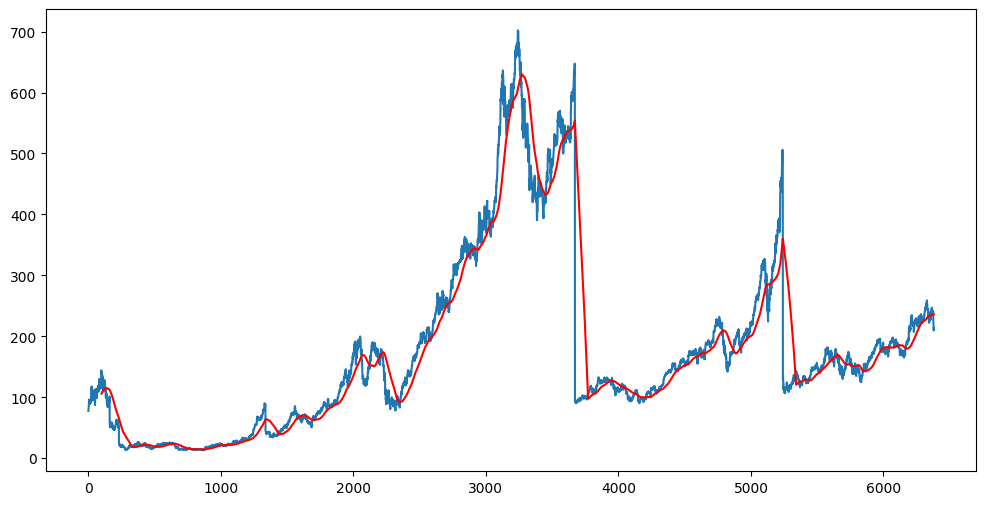

In [12]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
6376    227.26830
6377    227.41075
6378    227.54115
6379    227.65515
6380    227.77270
Name: Close, Length: 6381, dtype: float64

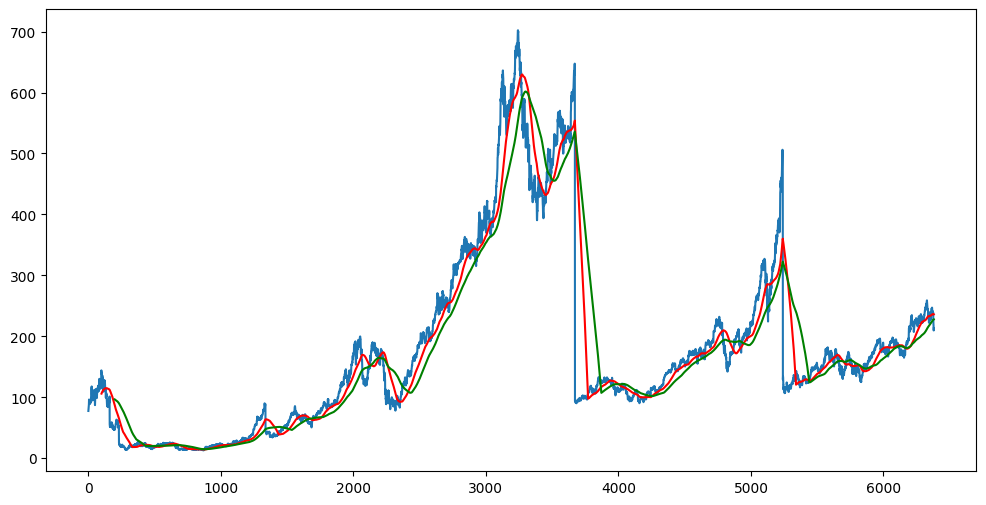

In [14]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(6381, 5)

In [16]:
#split data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70) : int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4466, 1)
(1915, 1)


In [17]:
data_training.head()

,Close
0,77.62
1,80.25
2,81.50
3,83.62
4,88.31


In [18]:
data_testing.head()

,Close
4466,157.14
4467,155.57
4468,156.39
4469,158.81
4470,160.08


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array 

array([[0.09361665],
       [0.09743389],
       [0.09924816],
       ...,
       [0.19794479],
       [0.19682719],
       [0.19874307]])

In [21]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100 : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(4366, 100, 1)

In [23]:
#Model building - sequential model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2025-03-16 18:12:28.662679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
#Lstm input is 3d array - > batch_size, time_steps, seq_len
#lstm output can be 2d or 3d -> 2d (batch_size,units) or 3d (batch_size, time_steps, units)

model = Sequential()

model.add(LSTM(units = 50, activation = 'relu' , return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 44s 278ms/step - loss: 0.0229
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 275ms/step - loss: 0.0051
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 257ms/step - loss: 0.0040
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 270ms/step - loss: 0.0039
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 252ms/step - loss: 0.0032
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 257ms/step - loss: 0.0042
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 298ms/step - loss: 0.0032
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 259ms/step - loss: 0.0026
Epoch 9/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 236ms/step - loss: 0.0026
Epoch 10/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 233ms/step - loss: 0.0025
Epoch 11/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 237ms/step - loss: 0.0026
Epoch 12/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 276ms/step - loss: 0.0026
Epoch 13/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 261ms/step - loss: 0.0022
Epoch 14/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 254ms/step - loss: 0.0023
Epoch 15/50
137

In [27]:
model.save('keras_model.h5')

In [28]:
 data_testing.head()

,Close
4466,157.14
4467,155.57
4468,156.39
4469,158.81
4470,160.08


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [31]:
final_df

,Close
0,139.14
1,139.20
2,138.99
3,140.46
4,140.69
...,...
2010,227.48
2011,220.84
2012,216.98
2013,209.68


In [32]:
input_data = scaler.fit_transform(final_df)

In [33]:
input_data.shape

(2015, 1)

In [34]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [35]:
x_test.shape

(1915, 100, 1)

In [36]:
y_test.shape

(1915,)

In [37]:
y_predicted = model.predict(x_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step


In [38]:
y_predicted.shape

(1915, 1)

In [39]:
y_test

array([0.12598622, 0.12205385, 0.1241077 , ..., 0.27586725, 0.25758297,
       0.26712586])

In [40]:
y_predicted

array([[0.13775186],
       [0.13770422],
       [0.13817851],
       ...,
       [0.33966726],
       [0.3308854 ],
       [0.31765127]], dtype=float32)

In [41]:
scaler.scale_

array([0.0025047])

In [42]:
scaler_factor = 1 / 0.0025047
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

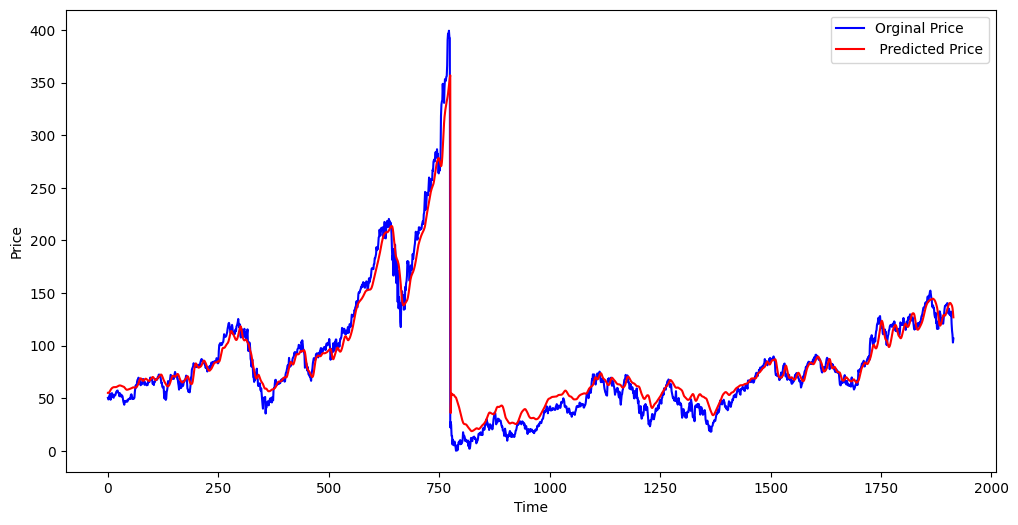

In [43]:
plt.figure(figsize = (12, 6))
plt.plot(y_test,'b', label = 'Orginal Price')
plt.plot(y_predicted,'r', label = ' Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()